# Análise de Dados - Insurance Claim

Para a realização das análises usarei as seguintes bibliotecas:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A variável que conterá o DataFrame dos dados será chamada de **insurance**:

In [13]:
insurance = pd.read_csv('insurance_claim.csv')

Para adicionar um tema mais estético aos gráficos, usarei o tema padrão do Seaborn:

In [14]:
sns.set_theme()

Abaixo está um resumo dos dados incluidos no dataset usado:

In [15]:
insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,LOCALITY,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,yes,after 2015,no,yes,New York,12000.0,sedan,0,0,0,approved
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,no,before 2015,no,no,New York,16000.0,sedan,0,0,0,denied
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,yes,before 2015,no,no,New York,11000.0,sedan,0,0,0,approved
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,yes,before 2015,no,yes,Miami,11000.0,sedan,0,0,0,approved
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,yes,before 2015,no,no,Miami,12000.0,sedan,2,0,1,denied


O dataset contém 10.000 dados diferentes, usaremos as informações deles para fazer análises sobre as claims de seguros e também haverá análises socioeconômicas possíveis de se fazer com eles.

<font color='gray'>*OBS: SE ALGUM GRÁFICO ESTIVER COM OS DADOS ERRADOS OU REPRESENTADO DE UMA MANEIRA ESQUISITA, RODE O CÓDIGO DA CÉLULA DO GRÁFICO QUE VOLTARÁ AO NORMAL. APARENTEMENTE OS GRÁFICOS MUDAM QUANDO RODA-SE O TODOS OS CÓDIGOS DE UMA VEZ E QUANDO RODA-SE ELES INDIVIDUALMENTE. (enfim um dos casos que só deus sabe o que é)*</font>

## Análise de features

Na análise de features irei analisar cada uma das variáveis do banco de dados (exceto as variáveis **outcome** e **ID**), refletindo a respeito de suas distribuições e correlações para tentar inferir teorias a respeito dos dados.

### Idade

Primeiramente, interessa-me saber qual é a faixa de idade em que mais ocorrem casos de pedidos de indenização, e para isso usarei o método <font color='skyblue'>filter()</font> para correlacionar os <font color='yellow'>ID's</font> com as <font color='yellow'>idades</font>, pois assim será possível contabilizar a quantidade de casos em que determinada faixa de idade aparece.

Em seguida, o método <font color='skyblue'>.groupby()</font> é usado para ordenar os dados pelas idades

Finalizando, o método <font color='skyblue'>.count()</font> é usado para contabilizar os dados relacionados ao groupby (as idades)

In [16]:
insurance.filter(['AGE', 'ID']).groupby('AGE').count()

,ID
AGE,
16-25,2016
26-39,3063
40-64,2931
65+,1990


Observando a tabela, percebemos que a faixa de idade em que mais ocorrem pedidos de indenização é por volta dos dos 26-39 anos. Mas vale notar também que a quantidade de casos é semelhante à faixa dos 40-64 anos, mostrando que eventuais danos ao veículo ocorrem mais tarde na vida do motorista. 

Algumas explicações possíveis são devido à vida-útil do automóvel (em casos de descuido da mecânica do veículo), estresse no trabalho do indivíduo... até mesmo crise de meia-idade (como por exemplo comprar carros luxuosos e sofrer um assalto), dentre outras explicações.

Para verificarmos se a suposição sobre a vida-útil do veículo, podemos fazer um gráfico contabilizando a quantidade de casos em que a data do carro é de antes/depois de 2015 ordenado pelas idades, como o gráfico abaixo:

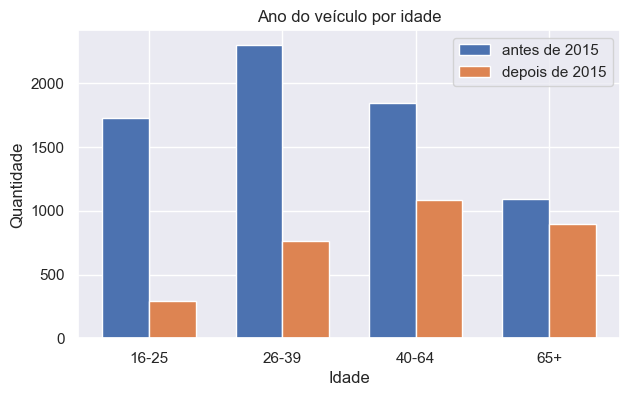

In [17]:
ages = insurance['AGE'].unique() #Recebe todos os tipos de idade
ages.sort() #Ordena os tipos de idade

before2015 = insurance[insurance['VEHICLE_YEAR'] == "before 2015"].groupby('AGE').count()['ID'] #Conta a quantidade de veículos antes de 2015 por idade
after2015 = insurance[insurance['VEHICLE_YEAR'] == "after 2015"].groupby('AGE').count()['ID'] #Conta a quantidade de veículos depois de 2015 por idade

values = np.arange(len(ages)) #Cria um array com o tamanho do array de idades
width = 0.35 #Largura das barras

plt.figure(figsize=(7,4)) #Define o tamanho da figura
plt.bar(values, before2015, width, label='antes de 2015') #Cria a barra relacionada aos dados de antes de 2015
plt.bar(values + width, after2015, width, label='depois de 2015') #Cria a barra relacionada aos dados de depois de 2015

plt.title("Ano do veículo por idade") #Define o título do gráfico
plt.ylabel('Quantidade') #Define o título do eixo y
plt.xlabel('Idade') #Define o título do eixo x
plt.xticks(values + width / 2, ages) #Define o posicionamento dos valores do eixo x
plt.legend() #Adiciona a legenda
plt.show() #Mostra o gráfico

Podemos confirmar então que a vida-útil do veículo é relevante para o número de acidentes, visto que a faixa-etária que tinha mais pedidos de indenização (26-39) é a que mais possui veículos com ano antes de 2015.

Um fato a ser observado também é que a faixa em que ocorrem menos pedidos de indenização é de 65 anos pra cima, que é a idade da aposentadoria do indivíduo, indicando que pessoas mais velhas tendem a dirigir menos, talvez devido ao agravamento de doenças que dificultem a atividade, como por exemplo a síndrome de Parkinson.

#### Relação Estado Civil x Idade

Uma análise interessante para se fazer é sobre a relação de idade/casamentos, podemos ver no gráfico abaixo que a faixa de idade em que há mais pessoas casadas é dos 40-64 anos. Porém, ao chegar na numa faixa etária maior, há menos pessoas casadas, o que significa que casais se tornaram viúvos :(.

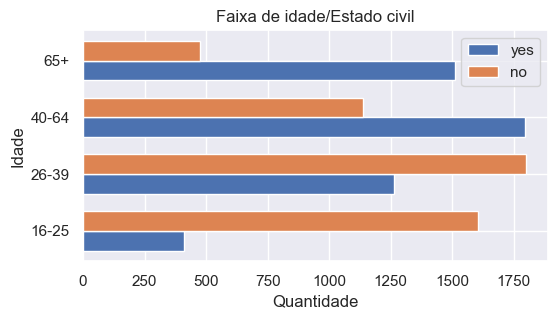

In [18]:
married = insurance[insurance['MARRIED'] == 'yes'].groupby('AGE').count()['ID']
notmarried = insurance[insurance['MARRIED'] == 'no'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 0.35

plt.figure(figsize=(6,3))
plt.barh(values, married, width, label='yes') #Cria a barra horizontal relacionada aos dados de pessoas casadas
plt.barh(values + width, notmarried, width, label='no') #Cria a barra horizontal relacionada aos dados de pessoas não casadas

plt.title("Faixa de idade/Estado civil")
plt.xlabel('Quantidade')
plt.ylabel('Idade')
plt.yticks(values + width / 2, ages)
plt.legend()
plt.show()

#### Relação Idade x Renda

Por termos de curiosidade podemos ver também a relação entre a <font color=yellow>idade</font> dos indivíduos e suas <font color=yellow>rendas</font>:

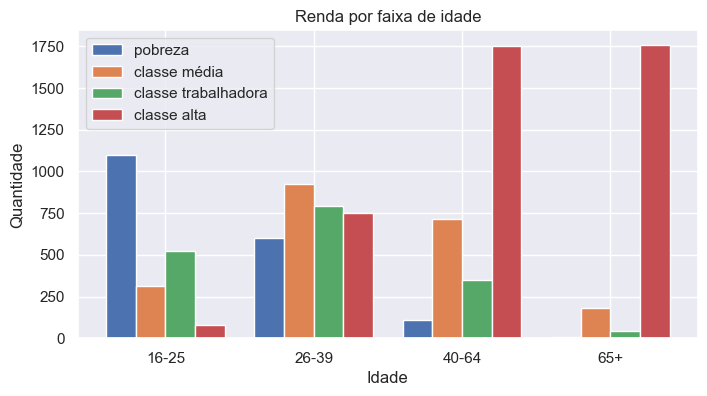

In [19]:
income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('AGE').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('AGE').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('AGE').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 1/5

plt.figure(figsize=(8,4))
plt.bar(values, income1, width, label='pobreza')
plt.bar(values + width, income2, width, label='classe média')
plt.bar(values + 2*width, income3, width, label='classe trabalhadora')
plt.bar(values + 3*width, income4, width, label='classe alta')

plt.title("Renda por faixa de idade")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.xticks(values + 3*width/2, ages)
plt.legend()
plt.show()


O gráfico acima mostra a quantidade de casos relacionados ao tipo de renda agrupado pelas faixas-etárias.

Como podemos ver no gráfico de linhas acima, a idade em que apresenta mais pessoas com a classe alta é dos 40 anos pra cima, junto também com os menores casos de pobreza. Isso pode-se dar devido ao sucesso na vida profissional dos indivíduos e também à aposentadoria.

#### Relação Idade x Tipo de Carro

Podemos também analisar quais são os gostos preferenciais quanto ao <font color=yellow>tipo de carro</font> dos indivíduos pela <font color=yellow>idade</font>:

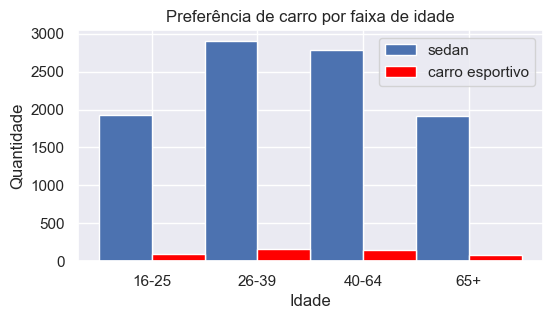

In [20]:
car1 = insurance[insurance['VEHICLE_TYPE'] == 'sedan'].groupby('AGE').count()['ID']
car2 = insurance[insurance['VEHICLE_TYPE'] == 'sports car'].groupby('AGE').count()['ID']

values = np.arange(len(ages))
width = 0.5

plt.figure(figsize=(6,3))
plt.bar(values, car1, width, label='sedan')
plt.bar(values + width, car2, width, label='carro esportivo', color='red')

plt.title("Preferência de carro por faixa de idade")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.xticks(values + width/2, ages)
plt.legend()
plt.show()

A escolha por um Sedan é a escolha majoritária entre os indivíduos, tanto por ser um carro de baixo custo e popular entre as pessoas, como diz uma notícia do Uol feita em 2021: <a href="https://www.uol.com.br/carros/noticias/redacao/2021/06/23/por-que-carros-populares-nos-eua-viram-modelos-de-luxo-no-brasil.htm">Por que carros 'populares' nos EUA viram modelos de luxo no Brasil</a>.

A compra de um carro esportivo se dá mais preferencialmente na meia-idade, onde inclusive acontece a famosa "Crise de meia-idade", momento em que pessoas adquirem frustração e ansiedade pelo pensamento de não ter aproveitado a vida o suficiente. 

#### Relação Idade x DUIS

O crime DUI, Driving Under the Influence (em português "Dirigir sob influência"), é o crime cometido quando se dirige sob influência alcóolica ou de drogas.  Os estatutos variam de acordo com cada estado norte-americano, porém a variação do nível o qual uma pessoa pode dirigir em segurança ou não é de 0,08 a 0,10 gramas de álcool.

No nosso dataset temos a variável referente ao número de infrações cometidas pelo segurado por embriaguez ao volante, vamos analisar em qual idade mais ocorre esse crime:

[Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Quantidade de infrações DUI'),
 Text(0.5, 1.0, 'Número de infrações DUI por idade')]

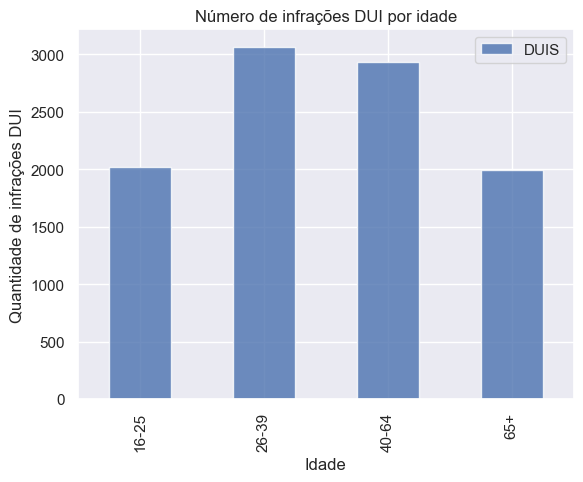

In [21]:
insurance.filter(['AGE', 'DUIS']).groupby('AGE').count().plot(kind='bar', alpha=0.8, grid=True).set(xlabel='Idade', ylabel='Quantidade de infrações DUI', title='Número de infrações DUI por idade') #o método set() permite definir o título do gráfico e dos eixos x e y

Analisando a tabela vemos que as faixas-etárias de 26-39 e 40-64 são as que mais acumularam DUIS, e as faixas de pessoas jovens e idosas ficam bem equiparadas.

Para fazermos uma comparação entre as quantidades, podemos usar os dados da tabela abaixo e fazer uma proporção da **DUIS cometidas pela faixa-etária 26-39** pelas **DUIS cometidas pela faixa-etária 16-25**:

In [22]:
insurance.filter(['AGE', 'DUIS']).groupby('AGE').count()

,DUIS
AGE,
16-25,2016
26-39,3063
40-64,2931
65+,1990


In [23]:
k = 100*(3063/2016)
print("A proporção é: " + str(round(k,2)) + "%")

A proporção é: 151.93%


Ou seja, os adultos de 26-39 anos bebem 51.93% mais do que os jovens de 16-25. E essa quantidade de DUIS revela o descuido por parte dos adultos com bebidas álcoolicas ao dirigir.

### Gênero

Para verificar a variabilidade de dados em relação ao gênero, irei usar o mesmo método utilizado na análise das <font color=yellow>idades</fonts>:

In [24]:
insurance.filter(['GENDER', 'ID']).groupby('GENDER').count()

,ID
GENDER,
female,5010
male,4990


Podemos verificar que os dados estão igualitariamente distribuidos entre os <font color=yellow>gêneros</font>, portanto não é possível inferirmos alguma afirmação quanto a esses dados individualmente. 

#### Relação Gênero x Renda

Outra análise socioeconômica possível de se fazer é a relação do <font color=yellow>gênero</font> com a <font color=yellow>renda</font>:

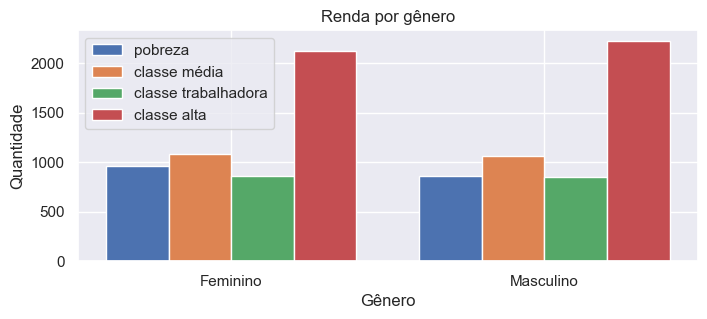

In [68]:
genders = insurance['GENDER'].unique()
genders.sort()

income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('GENDER').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('GENDER').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('GENDER').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('GENDER').count()['ID']

values = np.arange(len(genders))
width = 1/5

plt.figure(figsize=(8,3))
plt.bar(values, income1, width, label='pobreza')
plt.bar(values + width, income2, width, label='classe média')
plt.bar(values + (2*width), income3, width, label='classe trabalhadora')
plt.bar(values + (3*width), income4, width, label='classe alta')

plt.title("Renda por gênero")
plt.ylabel('Quantidade')
plt.xlabel('Gênero')
plt.xticks(values + 3*width/2, ['Feminino', 'Masculino'])
plt.legend()
plt.show()


Neste gráfico, onde as pessoas identificadas como do gênero feminino estão à esquerda e as do gênero masculino à direita, é possível notar uma diferença em relação à classe alta e a pobreza entre os gêneros, onde existem mais homens na classe alta do que mulheres e, ao mesmo tempo, existem mais mulheres em situação de pobreza do que homens na mesma.

#### Relação Gênero x Acidentes Passados

Nessa relação vamos investigar qual <font color=yellow>gênero</font> possui mais histórico de <font color=yellow>acidentes passados</font>:

Para isso usarei o método <font color='skyblue'>histplot()</font> para contabilizar a quantidade de acidentes passados de acordo com o gênero:

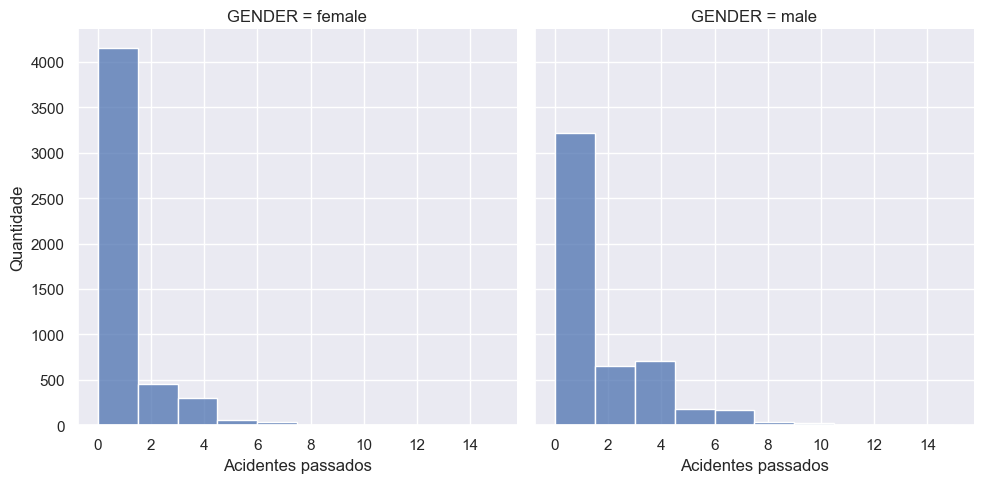

In [26]:
g = sns.FacetGrid(insurance, col='GENDER', height=5) ##O FacetGrid serve para criarmos múltiplos gráficos, um ao lado do outro
g.map(sns.histplot, 'PAST_ACCIDENTS', binwidth=1.5, bins=20).set(xlabel='Acidentes passados', ylabel='Quantidade') ##O map serve para aplicarmos uma função em cada um dos gráficos

O gráfico à esquerda representa os acidentes passados dos indivíduos declarados como mulheres e o gráfico à direita o dos declarados como homens. É notória a diferença entre as precauções no transito em relação aos gêneros. Enquanto as mulheres possuem raros casos de até 6 acidentes passados, os homens chegam a até 10 acidentes. Mostrando que os homens são mais descuidados ao dirigir.

### Etnia

Na análise das etnias o gráfico mostrará a diferença de distribuição entre a etnia majoritária e a etnia minoritária por um gráfico de pizza:

Usaremos o parâmetro <font color='skyblue'>autopct</font> para mostrar a porcentagem de cada etnia no gráfico.

Também usaremos o parâmetro <font color='skyblue'>startangle</font> para o gráfico começar a ser desenhado a partir de 90 graus.

E por último o parâmetro <font color='skyblue'>explode</font> para destacar a etnia minoritária do gráfico.

Text(0.5, 1.0, 'Proporção de etnia')

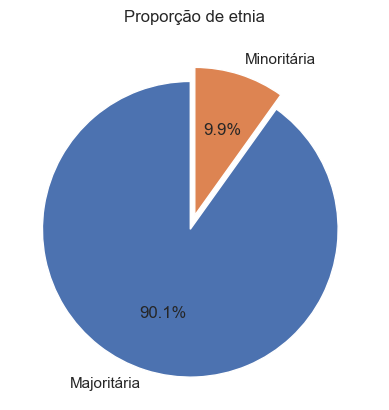

In [27]:
plt.pie(insurance.filter(['RACE', 'ID']).groupby('RACE').count()['ID'], labels=['Majoritária', 'Minoritária'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0)) #O autopct serve para mostrar os valores percentuais no gráfico, o startangle serve para definir o ângulo inicial do gráfico, o explode serve para destacar uma parte do gráfico

plt.title("Proporção de etnia")

Vendo tanto pelo gráfico pela tabela, podemos notar que a etnia majoritária aparece cerca de 9 vezes mais do que a minoritária.

#### Relação Etnia x Educação

Uma análise socioeconômica possível de se realizar é a relação entre a <font color=yellow>etnia</font> e a <font color=yellow>educação</font> dos indivíduos, para termos uma ideia se a etnia é um fator relevante quanto ao ensino do cidadão. O gráfico abaixo mostra a quantidade de ensinos registrados em cada etnia:

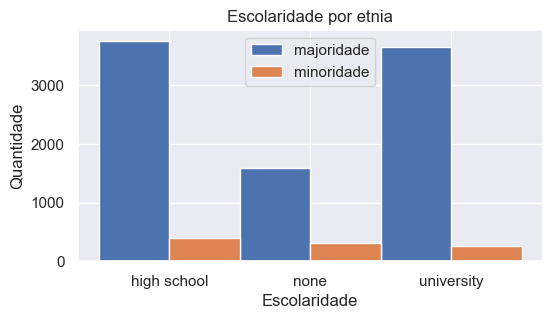

In [28]:
education = insurance['EDUCATION'].unique()

raceMajor = insurance[insurance['RACE'] == 'majority'].groupby('EDUCATION').count()['ID']
raceMinor = insurance[insurance['RACE'] == 'minority'].groupby('EDUCATION').count()['ID']

values = np.arange(len(education))
width = 0.5

plt.figure(figsize=(6,3))
plt.bar(values, raceMajor, width, label='majoridade')
plt.bar(values + width, raceMinor, width, label='minoridade')

plt.title("Escolaridade por etnia")
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(values + width/2, education)
plt.legend()
plt.show()


Porém não é efetivo compararmos as quantidades das duas etnias, dado que uma possui bem mais registros do que a outra. Portanto, usarei proporções para dizer o percentual de escolaridade de cada etnia, a começar pelo **grupo majoritário**:

In [29]:
print(insurance[insurance['RACE'] == 'majority'].groupby('EDUCATION').count()['ID'])

EDUCATION
high school    3755
none           1596
university     3661
Name: ID, dtype: int64


Vemos que nesse grupo 1596 pessoas não possuem escolaridade, 3755 possuem ensino médio completo e 3661 possuem graduação numa universidade. Usaremos esses dados na fórmula da proporção, que será dada por:

$$N_{i}/N_{total}$$
**Onde:** 

$N_{i}$ = quantidade de pessoas com escolaridade $i$; 

$N_{total}$ = quantidade de pessoas total do grupo

*OBS:* o resultado será arredondado para até duas casas decimais, para uma visualização mais estética dos resultados.

In [30]:
num = 9012 #número de pessoas da raça majoritária
print("Proporção de alunos de raça majoritária sem ensino: " + str(round(100*(1596/num),2)) + "%")
print("Proporção de alunos de raça majoritária com ensino médio completo: " + str(round(100*(3755/num),2)) + "%")
print("Proporção de alunos de raça majoritária com universidade completa: " + str(round(100*(3661/num),2)) + "%")

Proporção de alunos de raça majoritária sem ensino: 17.71%
Proporção de alunos de raça majoritária com ensino médio completo: 41.67%
Proporção de alunos de raça majoritária com universidade completa: 40.62%


Vemos que cerca de 82,29% (41,67% + 40,62%) dos indivíduos de raça majoritária possuem pelo menos uma escolaridade.

Agora partiremos para as proporções do **grupo minoritário**:

In [31]:
print(insurance[insurance['RACE'] == 'minority'].groupby('EDUCATION').count()['ID'])

EDUCATION
high school    402
none           319
university     267
Name: ID, dtype: int64


In [32]:
num = 988
print("Proporção de alunos de raça minoritária sem ensino: " + str(round(100*(319/num),2)) + "%")
print("Proporção de alunos de raça minoritária com ensino médio completo: " + str(round(100*(402/num),2)) + "%")
print("Proporção de alunos de raça minoritária com universidade completo: " + str(round(100*(267/num),2)) + "%")

Proporção de alunos de raça minoritária sem ensino: 32.29%
Proporção de alunos de raça minoritária com ensino médio completo: 40.69%
Proporção de alunos de raça minoritária com universidade completo: 27.02%


Vemos que cerca de 67,71% (40,69% + 27,02%) dos indivíduos de raça minoritária possuem pelo menos uma escolaridade.

Podemos observar então que a etnia é realmente um fator relevante no fator da escolaridade, dado que o grupo da raça minoritária obteve uma proporção menor em relação ao outro grupo.

### Experiência em dirigir

Ao analisarmos a quantidade de pedidos de indenização pela <font color='yellow'>experiência em dirigir</font> do motorista, logicamente e visualmente poderemos observar que conforme o indivíduo tem mais experiência, menos acidentes acontecem. Como mostra o gráfico abaixo:

<Axes: title={'center': 'Quantidade de cada experiência de condução'}, xlabel='Experiência de condução', ylabel='Quantidade'>

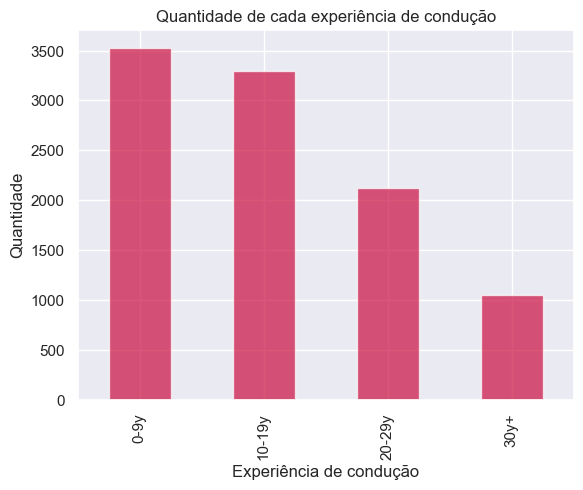

In [33]:
accidents = insurance.filter(['DRIVING_EXPERIENCE', 'ID']).groupby('DRIVING_EXPERIENCE').count()['ID']
accidents.plot(kind='bar', color='#cb0e40', alpha=0.7, grid=True, xlabel='Experiência de condução', ylabel='Quantidade', title='Quantidade de cada experiência de condução')

### Escolaridade

Agora iremos analisar o fator da escolaridade no nosso dataset, vamos começar com a quantidade de indivíduos que possuem cada tipo de <font color='yellow'>escolaridade</font>:

([<matplotlib.axis.XTick at 0x1c142785970>,
 [Text(0, 0, 'Ensino médio completo'),
  Text(1, 0, 'Ensino médio incompleto'),
  Text(2, 0, 'Ensino superior completo')])

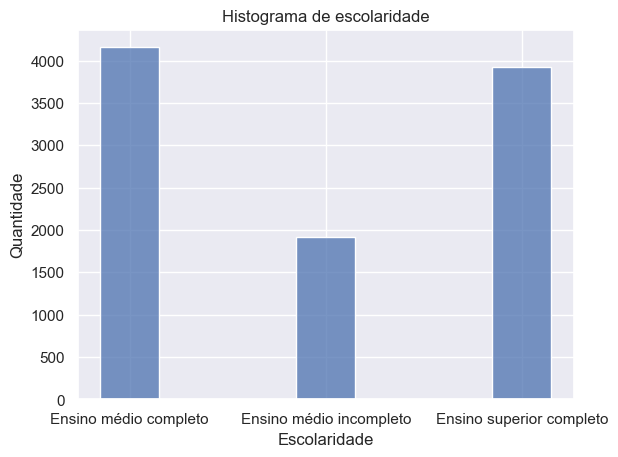

In [67]:
sns.histplot(insurance, x='EDUCATION', shrink=0.3).set(title='Histograma de escolaridade', xlabel='Escolaridade', ylabel='Quantidade')

plt.xticks([0,1,2], ['Ensino médio completo', 'Ensino médio incompleto', 'Ensino superior completo'])

Podemos ver que a maioria dos indivíduos possuem ensino médio completo, seguido de ensino superior completo e por último, ensino médio incompleto. Isso acontece porque para obter uma carteira de motorista é necessário ser alfabetizado, e pessoas que não possuem a escolaridade completa têm mais dificuldade quanto ao aprendizado da leitura e escrita.

#### Relação Escolaridade x Renda x Posse de Veículo

Nesta relação iremos analisar se os fatores <font color='yellow'>escolaridade</font>, <font color='yellow'>renda</font> e <font color='yellow'>posse de veículo</font> estão relacionados entre si. Para isso, organizaremos os dados pela escolaridade, contaremos o número de casos de cada renda (linhas) e contaremos o número de casos de se o indivíduo é proprietário do veículo (barras): 

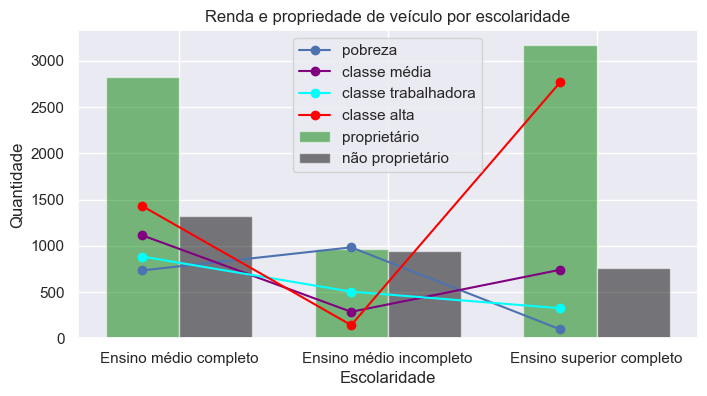

In [35]:
education = insurance['EDUCATION'].unique()

income1 = insurance[insurance['INCOME'] == 'poverty'].groupby('EDUCATION').count()['ID']
income2 = insurance[insurance['INCOME'] == 'middle class'].groupby('EDUCATION').count()['ID']
income3 = insurance[insurance['INCOME'] == 'working class'].groupby('EDUCATION').count()['ID']
income4 = insurance[insurance['INCOME'] == 'upper class'].groupby('EDUCATION').count()['ID']

yesOwner = insurance[insurance['VEHICLE_OWNERSHIP'] == 'yes'].groupby('EDUCATION').count()['ID']
noOwner = insurance[insurance['VEHICLE_OWNERSHIP'] == 'no'].groupby('EDUCATION').count()['ID']

values = np.arange(len(education))
width = 0.35

plt.figure(figsize=(8,4))
plt.plot(values, income1, color='b', marker='o', label='pobreza')
plt.plot(values, income2, color='purple', marker='o', label='classe média')
plt.plot(values, income3, color='aqua', marker='o', label='classe trabalhadora')
plt.plot(values, income4, color='red', marker='o',label='classe alta')

plt.bar(values, yesOwner, width, alpha=0.5, color='green', label='proprietário')
plt.bar(values + width, noOwner, width, alpha=0.5, color='black', label='não proprietário')

plt.title("Renda e propriedade de veículo por escolaridade")
plt.ylabel('Quantidade')
plt.xlabel('Escolaridade')
plt.xticks(values + width/2, ['Ensino médio completo', 'Ensino médio incompleto', 'Ensino superior completo'])
plt.legend()
plt.show()

Podemos ver que a relação entre a renda e a propriedade do veículo é diretamente proporcional, ou seja, quanto maior a renda, maior a probabilidade de o indivíduo possuir um veículo, e vice-versa. Podemos notar isso analisando que o caso em que há mais pobreza (quando a escolaridade é incompleta) é o caso em que há menos propriedade de veículo.

Ademais, pessoas com universidade completa são características por terem o maior índice de classe alta, e também possuem o maior índice de propriedade de veículo. O contrário também vale: pessoas com nenhuma escolaridade são características por terem o maior índice de pobreza.

### Renda

Quando analisamos o histograma da <font color='yellow'>renda</font> dos indivíduos, podemos descobrir qual é a renda que mais teve pedidos de indenização:

([<matplotlib.axis.XTick at 0x1c142c488b0>,
 [Text(0, 0, 'Pobreza'),
  Text(1, 0, 'Classe média'),
  Text(2, 0, 'Classe trabalhadora'),
  Text(3, 0, 'Classe alta')])

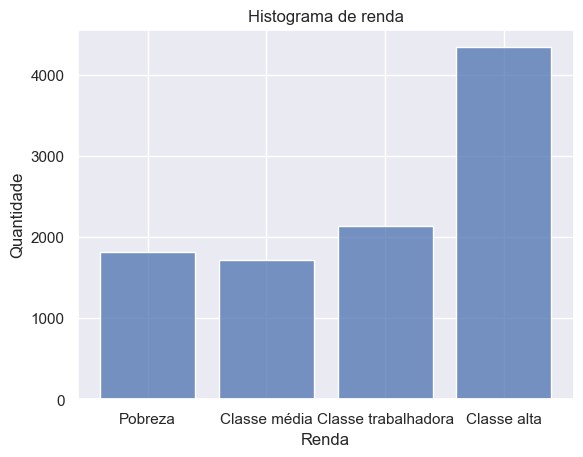

In [66]:
sns.histplot(insurance, x='INCOME', shrink=0.8).set(title='Histograma de renda', xlabel='Renda', ylabel='Quantidade')

plt.xticks([0,1,2,3], ['Pobreza', 'Classe média', 'Classe trabalhadora', 'Classe alta'])

Nesse caso, as pessoas com a renda de classe alta foram as que mais pediram indenização. Isso pode ser explicado pelo fato de que pessoas com renda alta possuírem mais condições de pagar pelo seguro do veículo.

#### Relação Renda x Pontos de crédito

Vamos analisar agora a relação entre a <font color='yellow'>renda</font> e os <font color='yellow'>pontos de crédito</font> do indivíduo:

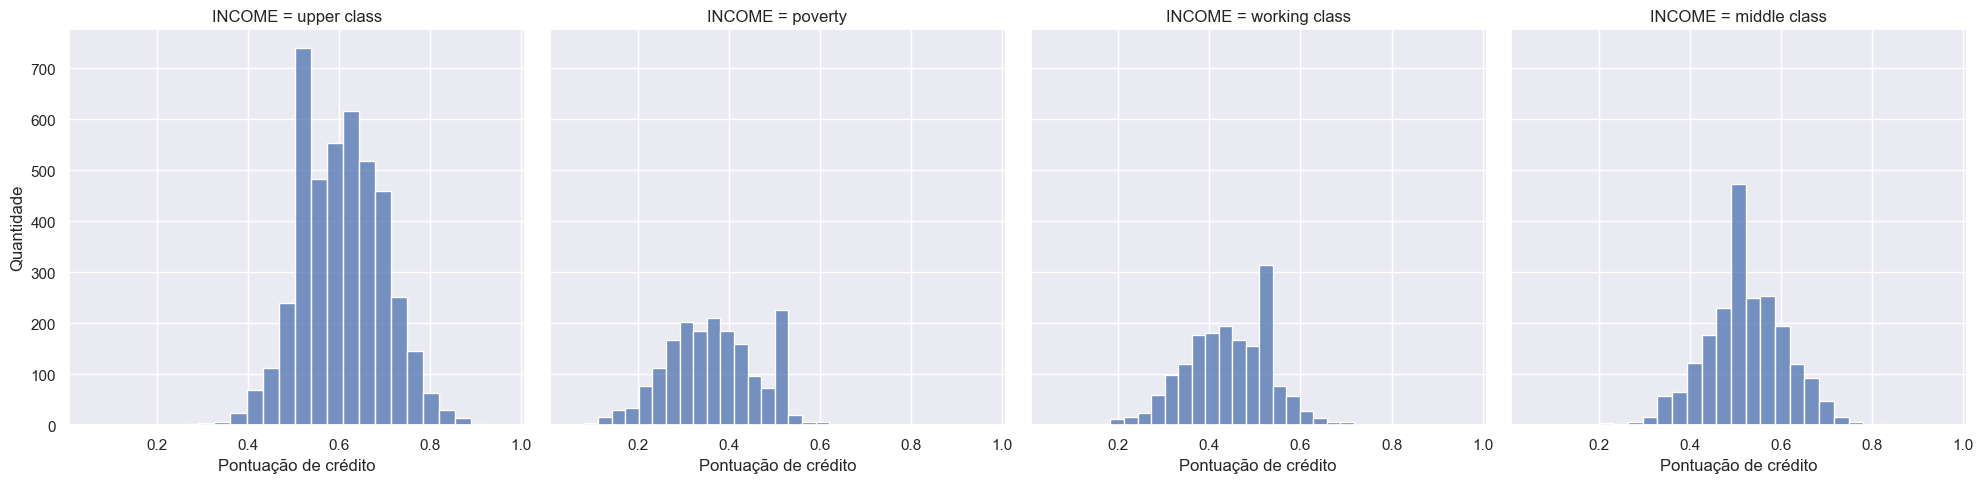

In [37]:
g = sns.FacetGrid(insurance, col='INCOME', height=5)
g.map(sns.histplot, 'CREDIT_SCORE', bins=20).set(xlabel='Pontuação de crédito', ylabel='Quantidade')

Vemos que existe sim uma grande diferença entre cada tipo de renda quando se trata do quão bom pagador o indivíduo é. Pessoas com renda alta são as que mais pagam em dia, enquanto pessoas com renda baixa são as que mais atrasam os pagamentos.

Podemos analisar isso mais estatisticamente pela tabela abaixo, que mostra a média de pontos de crédito de cada tipo de renda, além de outros dados estatísticos:

In [38]:
insurance.filter(['CREDIT_SCORE', 'INCOME']).groupby('INCOME').describe()

CREDIT_SCORE                                                    \
                     count      mean       std       min       25%       50%   
INCOME                                                                         
middle class        2138.0  0.522884  0.087848  0.199586  0.468203  0.515813   
poverty             1814.0  0.365135  0.100344  0.053358  0.293516  0.361944   
upper class         4336.0  0.604808  0.091803  0.255837  0.525999  0.605061   
working class       1712.0  0.441239  0.092086  0.123795  0.376898  0.446061   

                                   
                    75%       max  
INCOME                             
middle class   0.580780  0.844769  
poverty        0.436496  0.650351  
upper class    0.670612  0.960819  
working class  0.515813  0.717091

No caso da renda de pobreza, a média foi de 0.36 na pontuação de crédito, enquanto que na classe alta foi de 0.60. Vale notar também que a pontuação máxima de crédito da classe baixa foi de 0.65, quase a mesma pontuação **da média** da classe alta.

A média de pontos de crédito segue na ordem de renda: classe baixa < classe trabalhadora < classe média < classe alta.

#### Relação Renda x Filhos

Analisar a relação entre <font color='yellow'>renda</font> e <font color='yellow'>filhos</font> é interessante pois nos permite avaliar a Teoria Reformista (ou Marxista), que diz que a pobreza causa a superpopulação, ou seja, pessoas pobres tendem a ter mais filhos. Vamos analisar isso:

O parâmetro <font color='skyblue'>hue</font> relaciona o <font color='yellow'>INCOME</font> com <font color='yellow'>CHILDREN</font>, onde o eixo y representa a quantidade de <font color='yellow'>CHILDREN</font> para cada <font color='yellow'>INCOME</font>.

O parâmetro <font color='skyblue'>multiple</font> faz com que as barras fiquem organizadas uma ao lado da outra, seguindo a ordenação do eixo x.

O parâmetro <font color='skyblue'>shrink</font> faz com que as barras fiquem mais próximas umas das outras.

O parâmetro <font color='skyblue'>palette</font> muda a cor das barras.

([<matplotlib.axis.XTick at 0x1c142307850>,
 [Text(0, 0, 'Pobreza'),
  Text(1, 0, 'Classe média'),
  Text(2, 0, 'Classe trabalhadora'),
  Text(3, 0, 'Classe alta')])

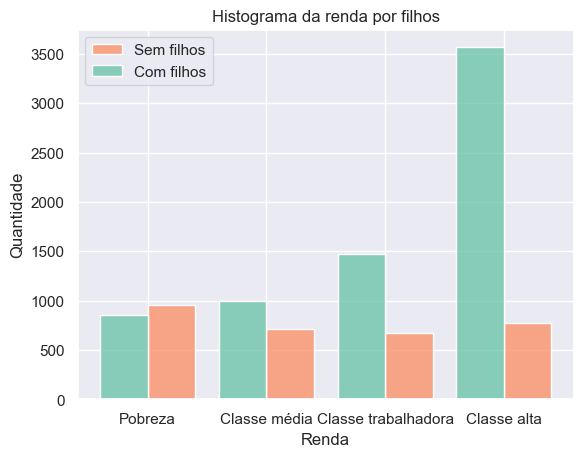

In [69]:
sns.histplot(data=insurance, x='INCOME', hue='CHILDREN', multiple='dodge', shrink=0.8, palette='Set2').set(title='Histograma da renda por filhos', xlabel='Renda', ylabel='Quantidade')

plt.legend(['Sem filhos', 'Com filhos'])
plt.xticks([0,1,2,3], ['Pobreza', 'Classe média', 'Classe trabalhadora', 'Classe alta'])

Pelo gráfico, podemos inferir que o tipo de renda que mais possui filhos é a classe alta, podendo ser devido ao fato de que pessoas dessa renda possuem mais condições de sustentar uma família maior. Por outro lado, a classe baixa é a que menos possui filhos, o que pode ser explicado pelo fato de que pessoas dessa renda possuem menos condições de sustentar uma família maior. Contrariando a Teoria Reformista, citada no começo.

*OBS:* Vale lembrar que apenas esses dados não são suficientes para afirmar que a Teoria Reformista é falsa, pois não analisamos outros fatores que podem influenciar na quantidade de filhos, como por exemplo a educação, a religião e a cultura. Mas esse não é o propósito dessa análise.

### Pontos de crédito

Para analisar os <font color='yellow'>pontos de créditos</font> individualmente usarei um histograma colorido, tanto por estética quanto pela melhor visualização dos dados:

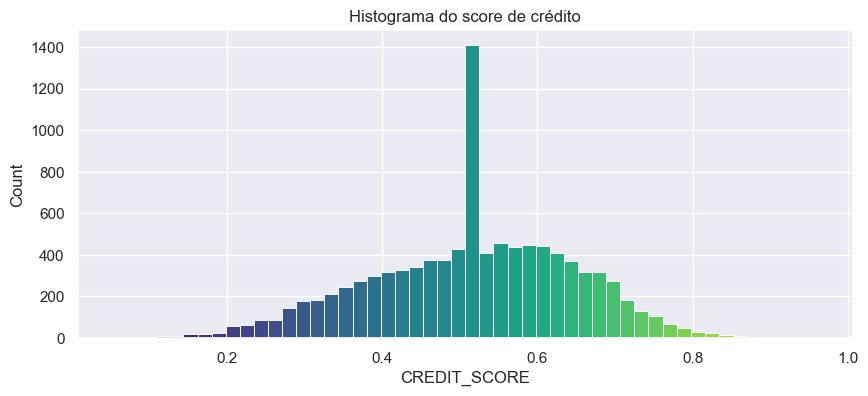

In [40]:
cm = sns.color_palette("viridis",50) #Cria uma paleta de cores com 50 tons de verde (baseado na paleta viridis)
plot = sns.histplot(x='CREDIT_SCORE',data=insurance, bins=50)
plot.figure.set_size_inches(10,4) #Define o tamanho do gráfico

for bin_,i in zip(plot.patches,cm): #Processo para colorir os bins
    bin_.set_facecolor(i)

plt.title("Histograma do score de crédito")
plt.show()

Podemos notar que a desvatadora maioria dos pontos de crédito se encontra próximo de 0.5, o que indica um pagador médio. Ademais, a quantidade de pontos de créditos maiores que 0.5 é maior do que a quantidade de pontos de créditos menores, o que indica que a maioria dos indivíduos são bons pagadores.

#### Relação Gênero x Pontos de crédito

Uma análise interessante a se fazer é a relação entre <font color='yellow'>gênero</font> e <font color='yellow'>pontos de crédito</font>. Vamos analisar se as mulheres são melhores pagadoras do que os homens:

CREDIT_SCORE                                                    \
              count      mean       std       min       25%       50%   
GENDER                                                                  
female       5010.0  0.525922  0.129773  0.053358  0.443756  0.515813   
male         4990.0  0.505663  0.130958  0.060867  0.417905  0.515813   

                            
             75%       max  
GENDER                      
female  0.617328  0.915883  
male    0.598641  0.960819

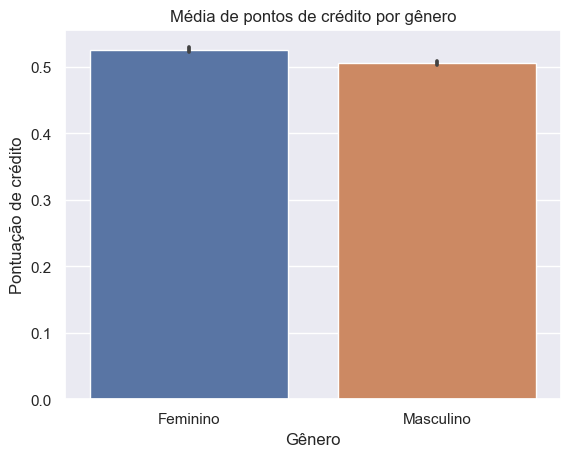

In [41]:
sns.barplot(data=insurance, x='GENDER', y='CREDIT_SCORE').set(title='Média de pontos de crédito por gênero', xlabel='Gênero', ylabel='Pontuação de crédito')

plt.xticks([0,1], ['Feminino', 'Masculino'])

insurance.filter(['CREDIT_SCORE', 'GENDER']).groupby('GENDER').describe()

Ao olhar a média dos scores dos gêneros, percebemos que as mulheres realmente pagam melhor do que os homens, o que pode ser explicado pelo fato de que as mulheres possuem mais cuidado com o dinheiro, e também por que elas possuem mais cuidado com o veículo (vimos isso em uma análise anterior).

### Propriedade do veículo

Para essa análise usaremos o parâmetro <font color='skyblue'>stat</font> para analisar a proporção de indivíduos <font color='yellow'>proprietários do veículo</font>:

([<matplotlib.axis.XTick at 0x1c1411e7a60>,
 [Text(0, 0, 'Proprietário'), Text(1, 0, 'Não proprietário')])

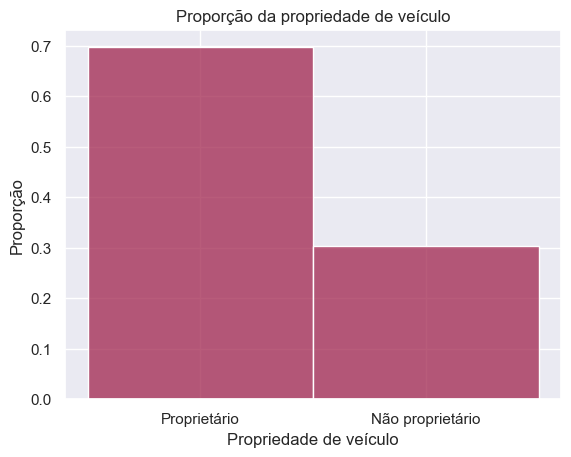

In [70]:
sns.histplot(data=insurance, x='VEHICLE_OWNERSHIP', stat='proportion', color='#a1254e').set(title='Proporção da propriedade de veículo', xlabel='Propriedade de veículo', ylabel='Proporção')

plt.xticks([0,1], ['Proprietário', 'Não proprietário'])

Nos dados registrados no dataset, cerca de 65% dos indivíduos eram donos do veículo, enquanto que 35% não eram. 

### Ano do veículo

É importante análisarmos o <font color='yellow'>ano do veículo</font>, visto que as peças do veículo podem sofrer desgastes naturais com o tempo, aumentando a probabilidade de ocorrer um acidente no trânsito. Para isso, vamos observar o histograma dos anos dos veículos:

([<matplotlib.axis.XTick at 0x1c141a699a0>,
 [Text(0, 0, 'Antes de 2015'), Text(1, 0, 'Depois de 2015')])

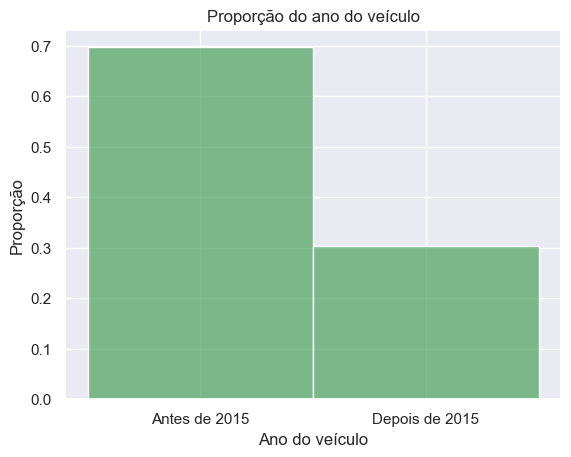

In [71]:
sns.histplot(data=insurance, x='VEHICLE_YEAR', stat='proportion', color='g').set(title='Proporção do ano do veículo', xlabel='Ano do veículo', ylabel='Proporção')

plt.xticks([0,1],['Antes de 2015','Depois de 2015'])

Percebemos então pelo gráfico que a maioria dos pedidos de indenização foram feitos por veículos com mais tempo de uso, o que enfatiza o fato dos acidentes serem mais comuns em veículos mais velhos.

### Estado Civil

No dataset, o <font color='yellow'>estado civil</font> representa se o indivíduo é casado ou não. Podemos ver pelo gráfico abaixo que a distribuição é bem equilibrada, portanto não podemos inferir nenhuma informação olhando para a feature individualmente.

([<matplotlib.axis.XTick at 0x1c13ab30e20>,
 [Text(0, 0, 'Não'), Text(1, 0, 'Sim')])

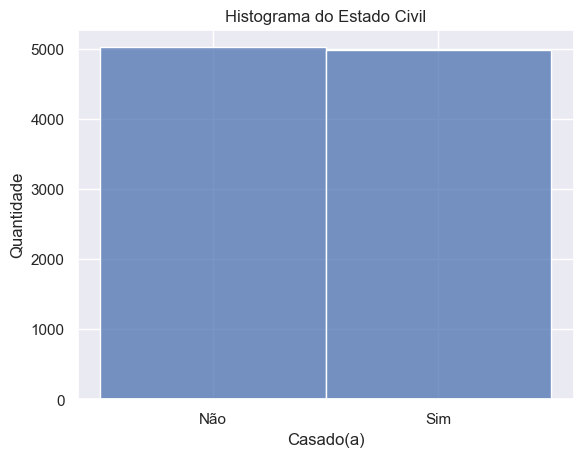

In [44]:
sns.histplot(insurance, x='MARRIED').set(title='Histograma do Estado Civil', xlabel='Casado(a)', ylabel='Quantidade')

plt.xticks([0,1], ['Não', 'Sim'])

#### Relação Estado Civil x Filhos

Uma análise interessante para realizarmos é sobre a relação entre <font color='yellow'>estado civil</font> e <font color='yellow'>filhos</font>. Vamos analisar se pessoas casadas tendem a ter mais filhos do que pessoas não declaradas casadas:

([<matplotlib.axis.XTick at 0x1c1410b9a00>,
 [Text(0, 0, 'Não'), Text(1, 0, 'Sim')])

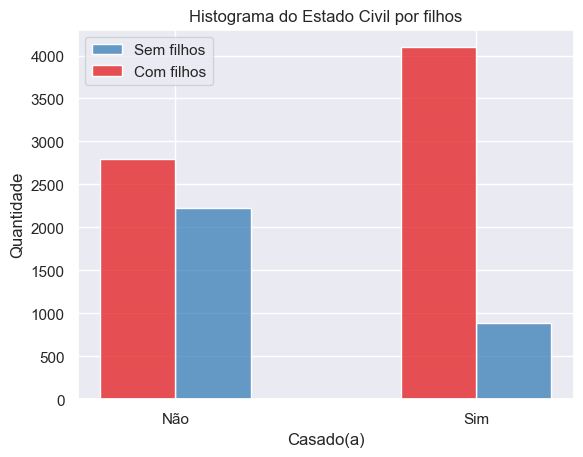

In [72]:
sns.histplot(data=insurance, x='MARRIED', hue='CHILDREN', multiple='dodge', shrink=0.5, palette='Set1').set(title='Histograma do Estado Civil por filhos', xlabel='Casado(a)', ylabel='Quantidade')

plt.legend(['Sem filhos', 'Com filhos'])
plt.xticks([0,1], ['Não', 'Sim'])

Realmente, pessoas casadas são as que mais possuem filhos, porém vale notar também que pessoas não-casadas ainda assim possuem um número considerável de filhos. Isso pode ser explicado pelo fato de que pessoas não-casadas podem ter filhos e então se divorciar, ou então terem filhos sem se casar.

#### Relação Estado Civil x Renda

Podemos também analisar como o <font color='yellow'>estado civil</font> se comporta em cada <font color='yellow'>renda</font>. Para isso faremos o gráfico de barras abaixo:

([<matplotlib.axis.XTick at 0x1c140407910>,
 [Text(0, 0, 'Não'), Text(1, 0, 'Sim')])

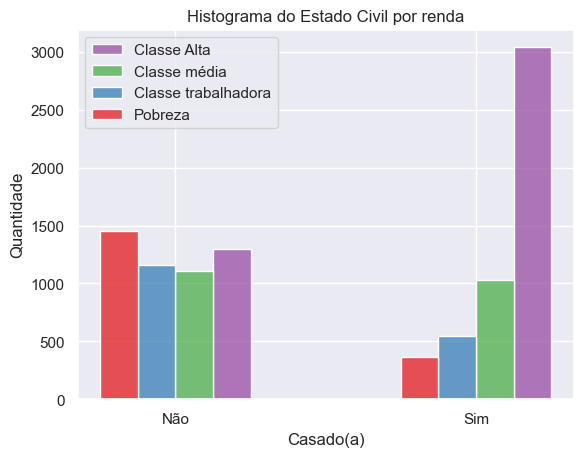

In [73]:
sns.histplot(data=insurance, x='MARRIED', hue='INCOME', multiple='dodge', shrink=0.5, palette='Set1').set(title='Histograma do Estado Civil por renda', xlabel='Casado(a)', ylabel='Quantidade')

plt.legend(['Classe Alta', 'Classe média', 'Classe trabalhadora', 'Pobreza'])
plt.xticks([0,1], ['Não', 'Sim'])

Podemos ver que a classe alta é a que mais possui pessoas casadas, em contra partida, a classe baixa é a que menos possui pessoas casadas. Isso pode ser explicado pelo fato de que pessoas com renda alta possuem mais condições comprar/alugar uma casa, pagar contas, etc. Enquanto que pessoas com renda baixa possuem menos condições de realizar tais coisas.

### Filhos

Na análise individual dos <font color='yellow'>filhos</font>, podemos ver que a maioria dos indivíduos possui filhos, como mostra o gráfico abaixo:

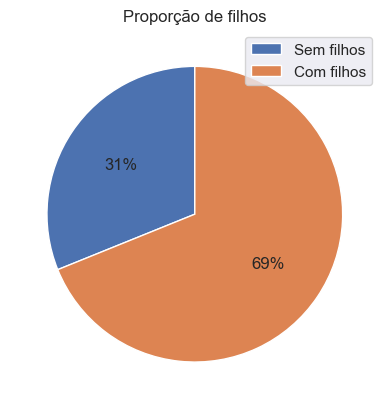

In [47]:
plt.pie(insurance.filter(['ID', 'CHILDREN']).groupby('CHILDREN').count()['ID'], autopct='%.0f%%', startangle=90)
plt.title('Proporção de filhos')
plt.legend(['Sem filhos', 'Com filhos'])
plt.show()

#### Relação Filhos x Acidentes Passados

Uma curiosidade interessante é se pessoas com <font color='yellow'>fihos</font> tendem a ter mais <font color='yellow'>acidentes passados</font> do que pessoas sem filhos. Vamos analisar isso:

([<matplotlib.axis.XTick at 0x1c140bfb400>,
 [Text(0, 0, 'Com filhos'), Text(1, 0, 'Sem filhos')])

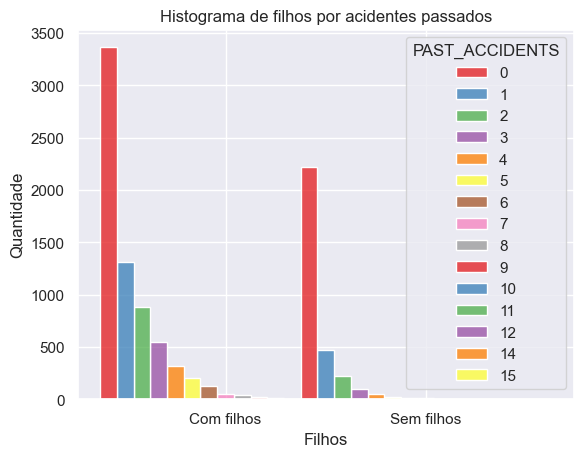

In [48]:
fg = sns.histplot(insurance, x='CHILDREN', hue='PAST_ACCIDENTS', multiple='dodge', shrink=1.25, palette='Set1').set(title='Histograma de filhos por acidentes passados', xlabel='Filhos', ylabel='Quantidade')

plt.xticks([0,1],['Com filhos', 'Sem filhos'])

Análisando o gráfico, percebemos que pessoas com filhos tendem a ter mais acidentes do que pessoas sem filhos. Isso pode ser causado pelo estresse que as pessoas com filhos possuem, pois elas precisam se preocupar com a educação dos filhos, saúde, alimentação, etc. Isso pode causar estresse e consequentemente acidentes.

### Localidade

Saber a <font color='yellow'>localidade</font> da maioria dos pedidos de indenização é importante para que a seguradora possa saber onde focar seus esforços para melhorar a qualidade do serviço prestado. Para isso, vamos analisar o gráfico abaixo:

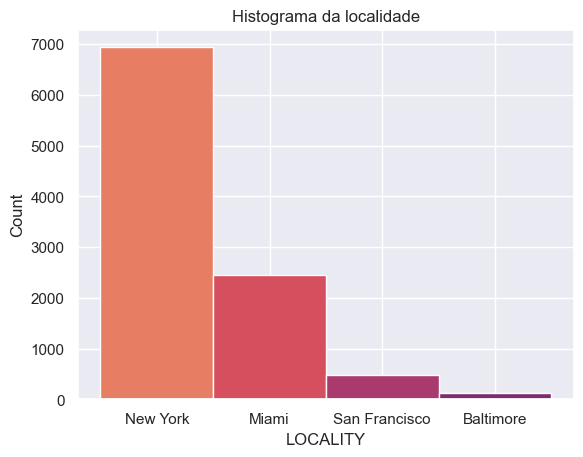

In [49]:
cm = sns.color_palette("flare",4)
    
plot = sns.histplot(x='LOCALITY',data=insurance, bins=4)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.title('Histograma da localidade')
plt.show()

Podemos ver que New York City é a cidade com mais pedidos de indenização. Isso pode ser explicado pelo fato de que a cidade é uma das mais populosas dos Estados Unidos, e portanto, possue mais indivíduos que podem ter um acidente de carro ou roubo.

#### Relação Localidade x Acidentes passados

Saber o local onde mais aconteceram acidentes é importante tanto para a seguradora quanto para pessoas interessadas em saber onde é mais seguro dirigir. Para isso, vamos analisar o gráfico abaixo:

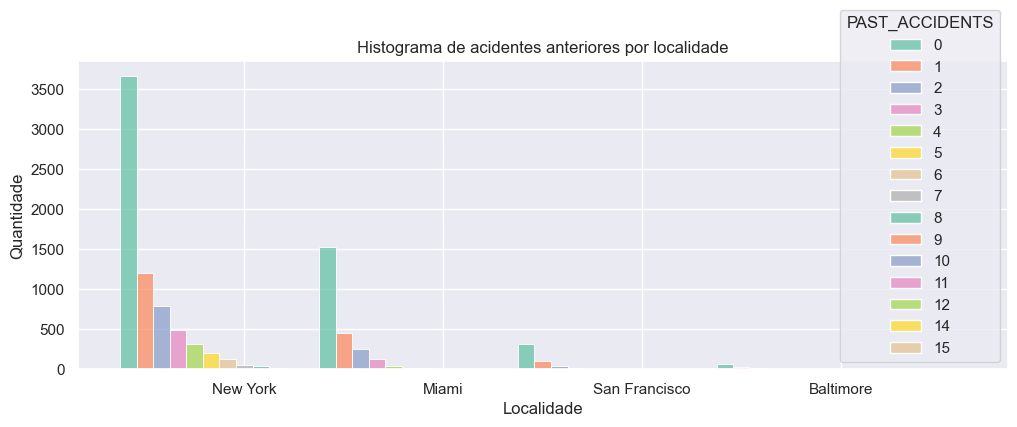

In [50]:
sns.histplot(data=insurance, x='LOCALITY', hue='PAST_ACCIDENTS', multiple='dodge', shrink=1.25, palette='Set2').set(title='Histograma de acidentes anteriores por localidade', xlabel='Localidade', ylabel='Quantidade')
plt.gcf().set_size_inches(12,4) #Define o tamanho do gráfico

Podemos ver que novamente New York City se destaca, agora por ser a cidade com mais acidentes passados. Inclusive tendo mais acidentes do que a soma dos acidentes das outras cidades no dataset.

### Quilometragem anual percorrida

Saber qual a <font color='yellow'>quilometragem anual percorrida</font> entre os invdivíduos é importante para sabermos qual é a quilometragem anual em que os acidentes começam a ser frequentes. Para isso, vamos analisar o gráfico abaixo:

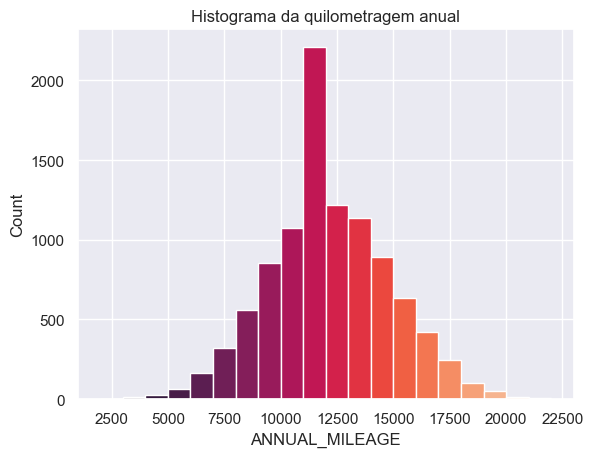

In [51]:
cm = sns.color_palette("rocket",20)
plot = sns.histplot(x='ANNUAL_MILEAGE',data=insurance, bins=20)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.title("Histograma da quilometragem anual")
plt.show()

Podemos descobrir qual é a moda dos dados, ou seja, o valor de quilometragem anual mais frequente, pelo método <font color='skyblue'>mode()</font>:

In [52]:
print("Moda da quilometragem anual: " + str(insurance['ANNUAL_MILEAGE'].mode()))

Moda da quilometragem anual: 0    11000.0
Name: ANNUAL_MILEAGE, dtype: float64


Como podemos ver, a moda é 11.000 km, ou seja, são mais frequentes pedidos de indenização por acidentes/roubos de veículos com essa quilometragem anual percorrida.

### Tipo de veículo

Já realizamos uma análise parcial dos <font color='yellow'>tipos de veículos</font> mais frequentes no nosso dataset anteriormente, mas agora vamos analisar a proporção de cada tipo de veículo:

[Text(0.5, 1.0, 'Proporção do tipo de veículo'),
 Text(0.5, 0, 'Tipo de veículo'),
 Text(0, 0.5, 'Proporção')]

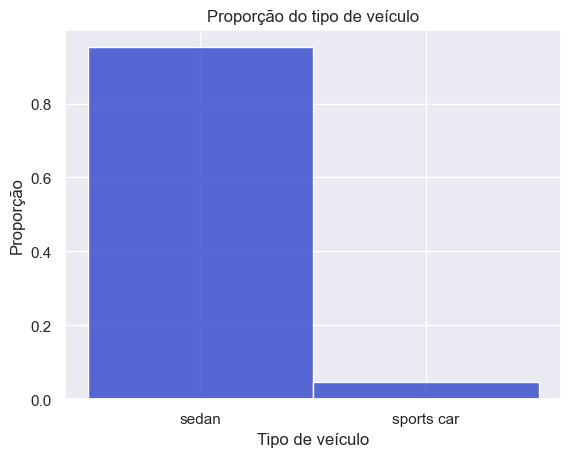

In [53]:
sns.histplot(insurance, x='VEHICLE_TYPE', stat='proportion', color='#233BC9').set(title='Proporção do tipo de veículo', xlabel='Tipo de veículo', ylabel='Proporção')

Pelo gráfico podemos verificar que os carros esportivos representam uma fração minúscula do total de veículos, enquanto que os carros familiares representam a grande maioria. Isso pois carros familiares são mais acessíveis e mais comuns do que carros esportivos, como dito anteriormente na análise.

#### Relação Tipo de veículo x Violações de velocidade

Será que só porque o carro é esportivo quer dizer que ele é mais propenso a <font color='yellow'>violações de velocidade</font>? Vamos analisar isso:

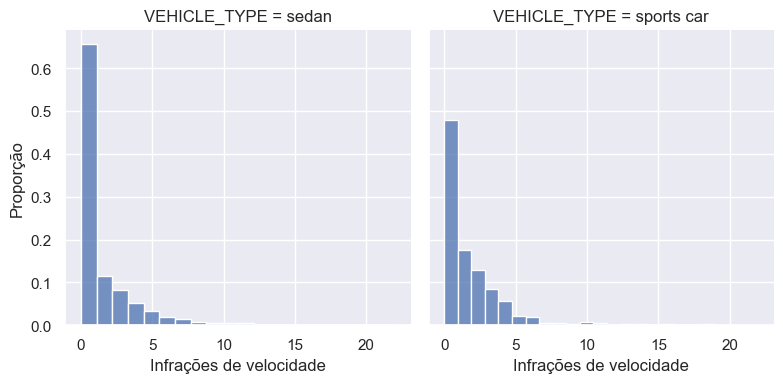

In [54]:
g = sns.FacetGrid(insurance, col='VEHICLE_TYPE', height=4)
g.map(sns.histplot, 'SPEEDING_VIOLATIONS', stat='proportion', bins=20).set(xlabel='Infrações de velocidade', ylabel='Proporção')

Realmente, carros esportivos possuem proporcionalmente mais violações de velocidade do que carros familiares. Aliás, quem não quer correr com um carro esportivo? É muito mais divertido do que dirigir um carro familiar.

### DUIS

É comum pessoas cometerem acidentes de trânsito por estarem embriagadas, porém as seguradoras não cobrem os prejuízos de acidentes causados por embriaguez. Vamos analisar então o gráfico abaixo:

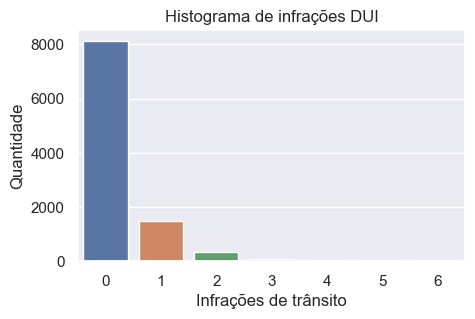

In [55]:
sns.countplot(insurance, x='DUIS').set(title='Histograma de infrações DUI', xlabel='Infrações de trânsito', ylabel='Quantidade')
plt.gcf().set_size_inches(5,3)

Podemos também visualizar os dados pela tabela abaixo:

In [56]:
insurance.filter(['ID', 'DUIS']).groupby('DUIS').count()

,ID
DUIS,
0,8118
1,1470
2,331
3,68
4,10
5,2
6,1


Como podemos ver, a maioria dos indivíduos não possuem DUIS, talvez porque saibam que a seguradora não irá cobrir os prejuízos causados por acidentes de trânsito causados por embriaguez. Porém ainda assim foram registrados 2.392 casos de DUIS nos registros dos indivíduos, o que é um número considerável.

#### Relação DUIS x Acidentes passados

Uma análise a se fazer é se os <font color='yellow'>acidentes passados</font> dos indivíduos são acompanhados por <font color='yellow'>DUIS</font>. Vamos analisar isso:

[Text(0.5, 1.0, 'Histograma de acidentes anteriores por infrações DUI'),
 Text(0.5, 0, 'Acidentes anteriores'),
 Text(0, 0.5, 'Proporção')]

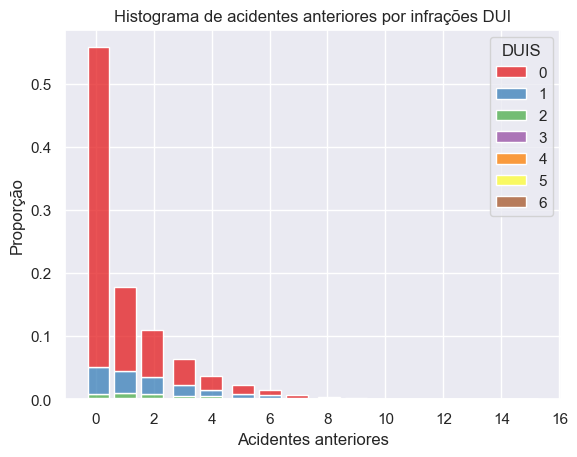

In [57]:
sns.histplot(insurance, x='PAST_ACCIDENTS', hue='DUIS', multiple='stack', stat='proportion', shrink=4, palette='Set1').set(title='Histograma de acidentes anteriores por infrações DUI', xlabel='Acidentes anteriores', ylabel='Proporção')

Podemos ver que grande parte dos acidentes passados não são acompanhados por DUIS, porém conforme o número de acidentes vai aumentando, a porporção acidentes/DUIS também aumenta. Isso significa que quanto mais acidentes o indivíduo teve, maior é a chance de algum deles ter sido por embriaguez.

## Análise de Outcome

Nesta seção irei analisar a correlação com a coluna <font color='yellow'>Outcome</font> com as outras features já analisadas, pois assim saberemos quais fatores mais influenciam quando a seguradora aprova a indenização do indivíduo.

### Relação Outcome: Pontos de Crédito

Para começar, vamos analisar a correlação entre <font color='yellow'>pontos de crédito</font> e a aprovação da indenização (ou <font color='yellow'>outcome</font>) pelo gráfico a seguir:

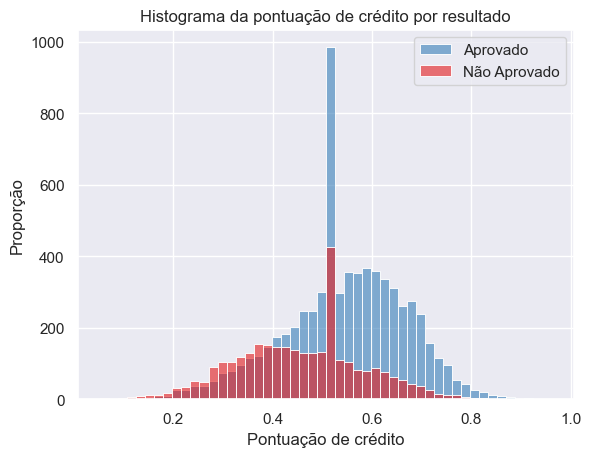

In [74]:
#make a graph that relates credit score with the outcome
sns.histplot(insurance, x='CREDIT_SCORE', hue='OUTCOME', alpha=0.6, bins=50, palette='Set1').set(title='Histograma da pontuação de crédito por resultado', xlabel='Pontuação de crédito', ylabel='Proporção')

plt.legend(['Aprovado', 'Não Aprovado'])

Podemos perceber que, conforme os pontos de crédito do indivíduo são grandes, a chance de ele ter a indenização aprovada é maior (lembrando que não é garantido, pois ainda assim existem casos em que o indíviduo é um bom pagador mas a indenização é reprovada).

O motivo pela seguradora escolher um indivíduo com uma alta pontuação de crédito é porque torna-se vantajoso essa escolha, pois a seguradora sabe que o indivíduo continuará pagando as parcelas do seguro, pois caso o contrário, a seguradora pode acabar perdendo dinheiro com o seguro do indivíduo.

### Relação Outcome: Renda

Vimos na **Análise de Features** que a renda tem bastante correlação com a pontuação de crédito, e como na análise anterior de outcome fizemos sobre os pontos de crédito, vamos agora analisar a correlação entre <font color='yellow'>renda</font> e a aprovação da indenização (ou <font color='yellow'>Outcome</font>) pelo histograma a seguir:

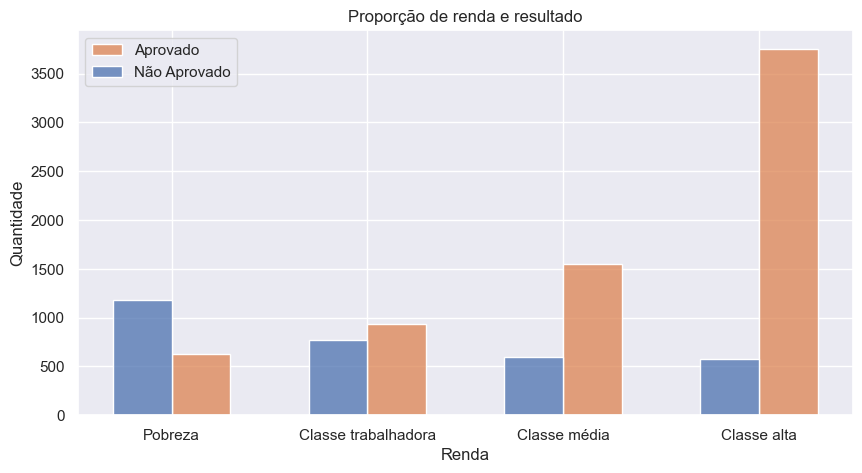

In [75]:
sns.histplot(insurance, x='INCOME', hue='OUTCOME', multiple='dodge', shrink=0.6).set(title='Proporção de renda e resultado', xlabel='Renda', ylabel='Quantidade')

plt.legend(['Aprovado', 'Não Aprovado'])
plt.xticks([0,1,2,3],['Pobreza', 'Classe trabalhadora', 'Classe média', 'Classe alta'])
plt.gcf().set_size_inches(10,5)

Na análise anterior descobrimos que a seguradora aceita mais pedidos de indenização de indivíduos com pontos de créditos altos, e como a renda está diretamente relacionada, podemos confirmar vendo este histograma que a seguradora aceita mais pedidos de indivíduos com a renda alta, sendo a proporção de claims aprovados muito maior que a proporção de claims reprovados para pessoas dessa renda.

Já quanto aos indivíduos categorizados como classe baixa (ou pobreza, como no gráfico), a taxa de reprovação das claims foi maior do que a de aprovação, o que é esperado, pois pessoas dessa classe possuem menos dinheiro para tornarem-se bons pagadores e terem uma boa pontuação de créditos, e portanto, a seguradora não quer correr o risco de perder dinheiro com o seguro do indivíduo.

### Relação Outcome: Experiência do Motorista e Escolaridade

Vamos analisar agora a relação que o <font color='yellow'>Outcome</font> tem com a <font color='yellow'>experiência do motorista</font> e a <font color='yellow'>escolaridade</font> do mesmo:

([<matplotlib.axis.YTick at 0x1c14413b2b0>,
 [Text(0, 0, 'Não aprovado'), Text(0, 1, 'Aprovado')])

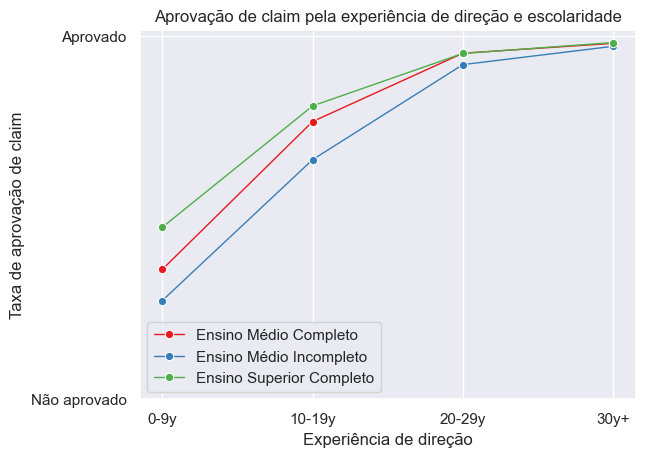

In [77]:
sns.lineplot(insurance, x='DRIVING_EXPERIENCE', y='OUTCOME', hue='EDUCATION', palette='Set1', lw=1, marker='o', errorbar=None).set(title="Aprovação de claim pela experiência de direção e escolaridade", xlabel="Experiência de direção", ylabel="Taxa de aprovação de claim")
plt.gca().invert_yaxis() #Inverte o eixo y para os resultados aparecerem crescentes

plt.legend(["Ensino Médio Completo", "Ensino Médio Incompleto","Ensino Superior Completo"])
plt.yticks([0,1], ['Não aprovado', 'Aprovado'])

O gráfico está representado da seguinte forma: no eixo x temos as categorias de experiência de direção, no eixo y temos a taxa de aprovação (quanto mais acima do gráfico, mais aprovação teve) da indenização e as linhas representam a taxa de aprovação da indenização para cada categoria de escolaridade.

Podemos ver pelo gráfio que a seguradora têm preferência pelos motoristas com mais experiência e com escolaridade cada vez melhor (ou seja, quanto melhor a escolaridade do invidívuo, maior a chance de ele ter a indenização aprovada). Porém o fator que mais mostra influência na taxa de aprovação é a experiência, pois conforme a experiência do indivíduo é maior, as taxas de aprovação são maiores também, sendo que a escolaridade apenas acompanha ambos.

### Relação Outcome: Idade

Verificamos anteriormente que a <font color='yellow'>experiência do motorista</font> é um fator importante para a seguradora aprovar a indenização, mas será que a <font color='yellow'>idade</font> também influencia? Vamos analisar isso:

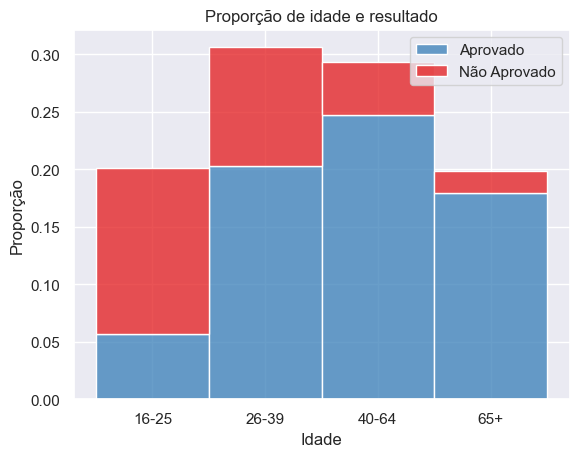

In [61]:
insurance.sort_values(by='AGE', inplace=True)
sns.histplot(insurance, x='AGE', hue='OUTCOME', multiple='stack', stat='proportion', palette='Set1').set(title='Proporção de idade e resultado', xlabel='Idade', ylabel='Proporção')

plt.legend(["Aprovado", "Não Aprovado"])

Neste gráfico estamos ordenando a proporção dos casos de indenização aprovados e reprovados por idade. Podemos ver que a proporção de casos aprovados é maior para indivíduos com idade mais avançada, ou seja, quanto mais velho o indivíduo, maior a chance de ele ter a indenização aprovada. Isso é de se esperar, pois indivíduos mais velhos tendem a ter mais experiência de direção, o que foi visto como um fator importante para a seguradora.

### Proprietário do Veículo x Renda

Será que a seguradora tem preferência por indivíduos que possuem um veículo próprio? E quanto aos indivíduos que possuem renda alta? Vamos analisar os dois fatores (<font color='yellow'>propriedade do veículo</font> e <font color='yellow'>renda</font>) juntos, como fizemos na *relação outcome: experiência do motorista e escolaridade*:

([<matplotlib.axis.YTick at 0x1c1423732e0>,
 [Text(0, 0, 'Não aprovado'), Text(0, 1, 'Aprovado')])

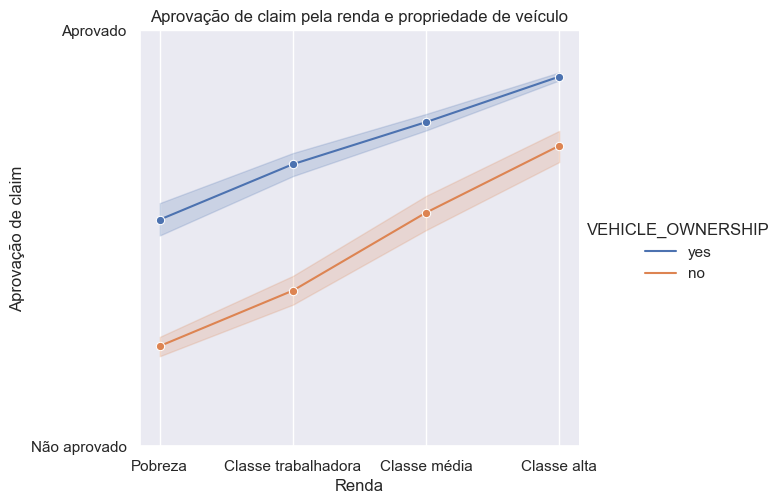

In [62]:
sns.relplot(insurance, kind='line', x='INCOME', y='OUTCOME', hue='VEHICLE_OWNERSHIP', marker='o').set(title='Aprovação de claim pela renda e propriedade de veículo', xlabel='Renda', ylabel='Aprovação de claim')
plt.gca().invert_yaxis() #Inverte o eixo y, pois o gráfico estava invertido

plt.xticks([0,1,2,3],['Pobreza','Classe trabalhadora','Classe média','Classe alta'])
plt.yticks([0,1], ['Não aprovado', 'Aprovado'])

Para compreendermos o gráfico, precisamos saber que no eixo x estão as categorias de renda, no eixo y temos a taxa de aprovação (quanto mais acima do gráfico, mais aprovação teve) da indenização e as linhas representam as taxas de claims aceitas de cada categoria de propriedade do veículo **naquela categoria de renda**. As linhas possuem uma "sombra" ao redor delas, essa "sombra" representa a faixa de erro do modelo, ou seja, a taxa de aprovação pode estar dentro dessa faixa de erro.

Podemos ver pelo gráfico que a renda do indivíduo interfere sim na aprovação da claim, pois conforme a renda do indivíduo aumenta, a taxa de aprovação também aumenta. Porém, o fator de propriedade do veículo tem influência também, pois a linha dos veículos não próprios é mais baixa que a linha dos veículos próprios, o que significa que a taxa de aprovação é menor para indivíduos que não possuem um veículo próprio.

Uma observação interessante a se tirar do gráfico é que a taxa de aprovação para indivíduos **pobres** e **proprietário do veículo** tem uma taxa equivalente ao de indivíduos da **classe média** e **não proprietário do veículo**. Mostrando como o fator de renda é importante para a seguradora.

### Relação Outcome: Gênero

Nesta relação iremos analisar se a feature <font color='yellow'>gênero</font> influencia na aprovação da indenização. Vamos usar um histograma de densidade para analisar a relação das colunas:

([<matplotlib.axis.YTick at 0x1c1426aa9d0>,
 [Text(0, 0, 'Não Aprovado'), Text(0, 1, 'Aprovado')])

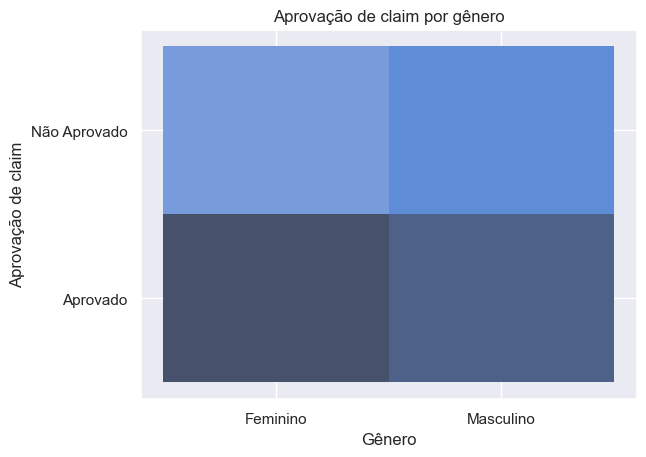

In [63]:
sns.histplot(insurance, x='GENDER', y='OUTCOME', stat='density').set(title='Aprovação de claim por gênero', xlabel='Gênero', ylabel='Aprovação de claim')

plt.xticks([0,1],['Feminino', 'Masculino'])
plt.yticks([0,1],['Não Aprovado', 'Aprovado'])

Para interpretar o diagrama, temos que ter em mente que quanto **mais escuro** a parte do histograma, **mais casos** do tipo tiveram. Por exemplo, no gráfico acima, podemos ver que a taxa de aprovação de indenização é maior para indivíduos do gênero feminino. Além disso, a menor taxa de reprovação é para indíviduos do gênero feminino (pois é a parte mais clara).

É importante lembrar que quando analisamos a feature <font color='yellow'>gênero</font> individualmente, verificamos que a distribuição dos gêneros estava equilibrada, então o nosso resultado neste gráfico de relação não está inviesado.

Vimos também na análise da relação entre <font color='yellow'>gênero</font> e <font color='yellow'>acidentes passados</font> que indivíduos do gênero feminino possuem menos acidentes no histórico, mostrando que realmente a seguradora tem preferência de cobrir os acidentes das mulheres, por ser mais vantajoso.

### Relação Outcome: Quilometragem Anual e Ano do Veículo

A <font color='yellow'>quilometragem anual</font> do veículo nos diz o quanto o motorista usa o carro por ano e, quanto mais o indivíduo usa o carro, maior a chance de acontecer um acidente. Por isso, a seguradora pode ter interesse em saber a quilometragem anual do indivíduo.

Podemos analisar a relação do <font color='yellow'>ano do veículo</font> com a taxa de aprovação também, será que a seguradora tem preferência por veículos mais novos? Vamos analisar tanto o caso da quilometragem quanto o do ano do veículo:

([<matplotlib.axis.YTick at 0x1c1426fcc10>,
 [Text(0, 0, 'Não aprovado'), Text(0, 1, 'Aprovado')])

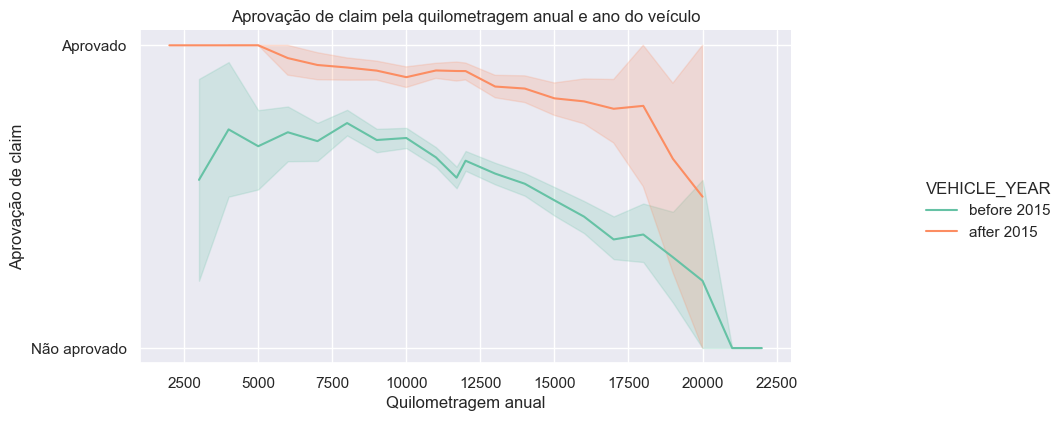

In [64]:
sns.relplot(insurance, kind='line', x='ANNUAL_MILEAGE', y='OUTCOME', hue='VEHICLE_YEAR', palette='Set2').set(title="Aprovação de claim pela quilometragem anual e ano do veículo", xlabel="Quilometragem anual", ylabel="Aprovação de claim")
plt.gca().invert_yaxis()

plt.gcf().set_size_inches(12,4)
plt.yticks([0,1],['Não aprovado', 'Aprovado'])

Podemos ver que, conforme a quilometragem anual do indivíduo aumenta, suas chances de ter a indenização aprovada diminuem. Isso é de se esperar, pois quanto mais o indivíduo usa o carro, maior a chance de acontecer um acidente e o seguro pagar mais caro pelo indivíduo. Porém, é importante notarmos também que o ano do veículo teve um fator de influência no gráfico. Observando podemos afirmar que a seguradora tem preferência por veículos mais novos, dado que o gráfico de aprovação dessa categoria está acima do que a categoria dos veículos mais antigos.

Isso acontece pois é mais difícil para a seguradora cobrir danos de um veículo mais antigo, dado que, quando um acidente acontece, as partes velhas do veículo acabam sendo danificadas e, na maioria das vezes, essas partes nem são mais fabricadas.

Além de que modelos de carros mais caros são vistos como lucro e relíquia, sendo alvos frequentes de roubos e furtos. Esse fator é contribuido também pelo fato dos modelos mais antigos não serem mais fabricados e assim valorizarem seu valor.

## Relação Outcome: Acidentes Passados e Renda

Vamos verificar agora se a <font color='yellow'>quantidade de acidentes passados</font> no registro do indivíduo influencia na aprovação da indenização. Afinal, a intuição é de que quanto mais acidentes o indivíduo teve, menor deve ser a chance de ele ter a indenização aprovada. Certo?

Vimos também que a <font color='yellow'>renda</font> do indivíduo influencia na aprovação da indenização, então vamos analisar a relação entre essas duas features:

([<matplotlib.axis.YTick at 0x1c14279ed60>,
 [Text(0, 0, 'Não aprovado'), Text(0, 1, 'Aprovado')])

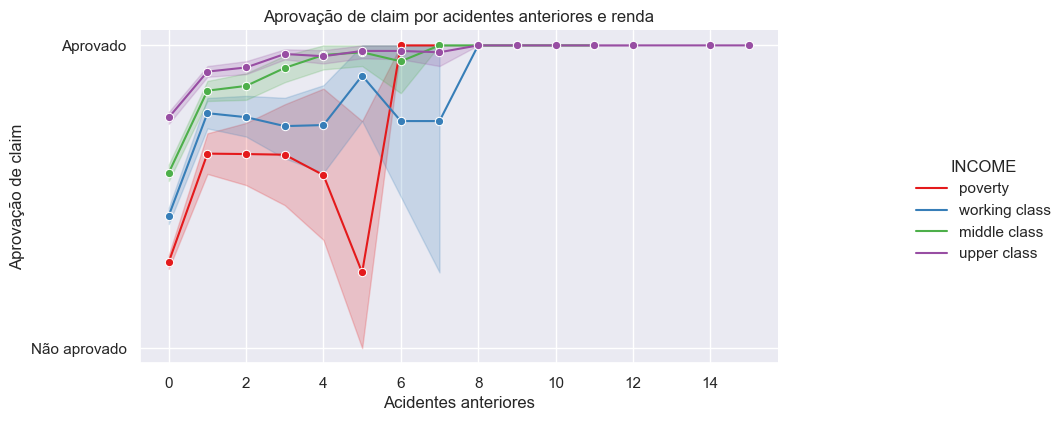

In [65]:
#make a relplot with the x='PAST_ACCIDENTS' and y='OUTCOME' and hue='INCOME'
sns.relplot(insurance, kind='line', x='PAST_ACCIDENTS', y='OUTCOME', hue='INCOME', palette='Set1', marker='o').set(title='Aprovação de claim por acidentes anteriores e renda', xlabel='Acidentes anteriores', ylabel='Aprovação de claim')

plt.gcf().set_size_inches(12,4)
plt.gca().invert_yaxis()

plt.yticks([0,1],['Não aprovado', 'Aprovado'])

Vamos analisar separadamente pela renda, a começar pela renda de <font color='aquamarine'>pobreza</font>: podemos perceber que a taxa de aprovação seguiu como prevíamos anteriormente, quanto mais acidentes o indivíduo tinha, menores eram as chances de a claim ser aprovada (ao final da linha da pobreza percebemos que os casos foram aceitos, mas a quantidade de tais casos foi muito pequena para levarmos em conta, devemos sempre considerar também a **margem de erro** ilustrada nas linhas).

Agora vamos analisar pela renda da <font color='aquamarine'>classe trabalhadora</font>: percebemos que conforme os acidentes anteriores cresciam, a média de aprovação permaneceu estável, mostrando que a quantidade de acidentes passados não influencia de forma significativa na aprovação para esta categoria de renda. Porém vale notar também que a margem de erro tanto tendia à aceitação quanto à negação da indenização ao aumentar a quantidade de acidentes.

Analisaremos agora pelas rendas da <font color='aquamarine'>classe média e alta</font>: quando analisamos as taxas de aprovação desta categoria de renda, percebemos que a nossa intuição (de que quanto mais acidentes, menos aprovações) se torna incorreta. Isso porque conforme a quantidade de acidentes passados aumentava para essas rendas, as suas taxas de aprovação ainda permaneciam altas, tendo até casos na classe alta em que foram registrados 15 acidentes e ainda assim foi aprovada a indenização. Isso mostra que, mesmo a quantidade de acidentes passados sendo influenciadora, a renda impacta muito mais na aprovação da claim. 

# Conclusões

Podemos perceber que com o dataset foi possível realizar tanto análises quanto aos claims quanto a análises socioeconômicas importantes dos indivíduos. Realizamos diversas pesquisas socioeconômicas nesta atividade, como por exemplo: A relação da renda com a posse do veículo, escolaridade por etnia, renda por gênero, acidentes passados por gênero, dentre outros. Isso nos mostra que só porque o dataset é de um assunto específico, não significa que não possamos extrair informações importantes sobre a sociedade no estudo. Além de que, com essas análises da sociedade, podemos aprender mais sobre como o mundo funciona e nos livrarmos da ideia de apenas pensar pela intuição.

Quanto à análise dos outcomes, as features que mais de destacaram por influenciar no resultado da outcome foram a idade, a experiência de motorista, o gênero (que nos mostrou para que a seguradora aceitou mais pedidos de mulheres do que de homens, mostrando que a seguradora confia seu dinheiro mais nas mulheres e, como analisamos anteriormente na relação Acidentes Passados x Gênero, isso se torna verdadeiro devido mulheres terem uma taxa menor de acidentes) e que aparenta ser a mais relevante quanto à decisão da seguradora: **a renda**.

A renda do indivíduo foi uma das variáveis mais frequentes usadas nesta análise de dados, servindo tanto para os modelos socioeconômicos quanto para os de aprovação de claim. Verificamos que essa feature consegue desde impactar em outras (como na Relação Renda x Pontos de Créditos) até contornar features ruins para a avaliação do indivíduo (como vimos na Relação Outcome: Acidentes Passados e Renda). E realmente faz sentido a seguradora dar prioridade aos clientes que possuem mais renda, isso porque bons pagadores fortalecem a seguradora e, consequentemente, a fama e o lucro da mesma, sendo os indivíduos de classe alta pontos seguros para a empresa também, no sentido de que a seguradora sabe que eles podem continuar pagando.



# Referências

**1. Seaborn** (Youtube) - <a href='https://www.youtube.com/watch?v=aLAIyimXylg&t'>Como fazer MÚLTIPLOS PLOTS no Seaborn (FacetGrid)</a>

**2. Matplotlib** (Youtube) - <a href='https://www.youtube.com/watch?v=1M65rAAcl5E&t'>Stacked & Multiple Bar Graph Using Python 😍 | Matplotlib Library | Step By Step Tutorial</a>

**3. Pandas (Histograma)** (Youtube) - <a href='https://www.youtube.com/watch?v=zNvxJNQhmRs'>Pandas Histogram | pd.DataFrame.hist()</a>

**4. Pandas (Barra)** (Youtube) - <a href='https://www.youtube.com/watch?v=lRPisI6kzLg'>Pandas Bar Plot | DataFrame.plot.bar()</a>

**5. Pandas (Groupby)** (Youtube) - <a href='https://www.youtube.com/watch?v=TRatkPjzHNE&t'>O poder do GROUPBY (pacote Pandas)| Análise de dados #4</a>

**6. Seaborn (Plot)** (Stackoverflow) - <a href='https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot'>How to set x axis ticklabels in a seaborn plot</a>

**7. Visualização de Dados** (Turing Talking) - <a href='https://medium.com/turing-talks/turing-talks-9-visualiza%C3%A7%C3%A3o-de-dados-93df670d479'>Data Science | Visualização de Dados</a>

**8. Seguradoras pagam por acidentes por embriaguez?** (John Foy & Associates) - <a href='https://www.johnfoy.com/faqs/do-insurance-companies-pay-for-drunk-driving-accidents/'>Do Insurance Companies Pay for Drunk Driving Accidents?</a>

**9. Popularidade dos carros nos EUA** (Uol) - <a href='https://www.uol.com.br/carros/noticias/redacao/2021/06/23/por-que-carros-populares-nos-eua-viram-modelos-de-luxo-no-brasil.htm'>Por que carros 'populares' nos EUA viram modelos de luxo no Brasil</a>

**10. Paleta de cores** (Seaborn) - <a href='https://seaborn.pydata.org/tutorial/color_palettes.html'>Choosing color palettes</a>

**11. Relações estatísticas entre variáveis** (Seaborn) - <a href='https://seaborn.pydata.org/tutorial/relational.html'>Visualizing statistical relationships</a>

**12. Como criar um gráfico de pizza** (Geeksforgeeks) - <a href='https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/'>How to Create a Pie Chart in Seaborn?</a>